<a href="https://colab.research.google.com/github/shreyamhetre/DSBDA/blob/lab6/DSBDA_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAÏVE BAYES classification for social data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score, precision_score , f1_score , recall_score

In [7]:
df = pd.read_csv('/content/Iris.csv')

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.shape

(150, 6)

In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [21]:
df = df.drop(['Id'], axis=1)

In [22]:
y = df['Species']

In [23]:
x = df[["SepalLengthCm" , "SepalLengthCm", "PetalLengthCm", "PetalWidthCm"]]

In [24]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [26]:
x_test ,x_train,y_test ,y_train = train_test_split(x,y, test_size = 0.2 , random_state=42)

In [27]:
x_test.shape ,x_train.shape ,y_test.shape  ,y_train.shape 

((120, 4), (30, 4), (120,), (30,))

In [28]:
model = GaussianNB()

In [29]:
model.fit(x_train , y_train)

GaussianNB()

In [30]:
y_pred = model.predict(x_test)

In [33]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[40  0  0]
 [ 0 40  1]
 [ 0  5 34]]


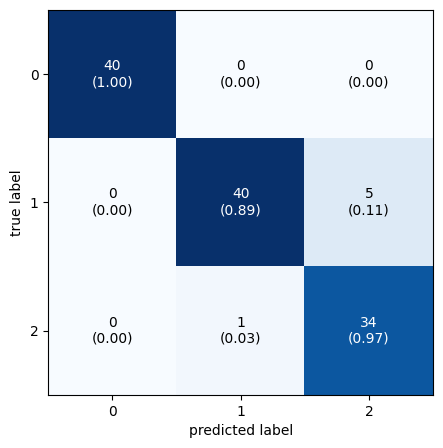

In [37]:
plot_confusion_matrix(conf_mat= cm , figsize=(5,5) , show_normed=True)
plt.show()

In [38]:
print(f"TP value is {cm[0,0]}")
print(f"TN value is {cm[1,1] + cm[2,2]}")
print(f"FP value is {cm[0,1] + cm[0,2]}")
print(f"FN value is {cm[1,0] + cm[2,0]}")

TP value is 40
TN value is 74
FP value is 0
FN value is 0


In [39]:
print(f"accuracy rate is {accuracy_score(y_test, y_pred)}")

accuracy rate is 0.95


In [41]:
print(f"Error rate is {1 - accuracy_score(y_test, y_pred)}")

Error rate is 0.050000000000000044


In [42]:
print(f"Precision score is {precision_score(y_test, y_pred, average='macro')}")

Precision score is 0.9534391534391534


In [43]:
print(f"Recall score is {recall_score(y_test, y_pred, average='macro')}")

Recall score is 0.9491348759641443


In [44]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.89      0.98      0.93        41
 Iris-virginica       0.97      0.87      0.92        39

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120

